In [1]:
import mlbfetch
import pandas as pd
pd.set_option('display.max_columns', None)

## Test Fetch with Data Classes and to_df()

In [2]:
all_players = mlbfetch.players(sport_id=1, season=2024)
someone = all_players[50]
print(someone.full_name, someone.bat_side)
all_players.to_df().head(3)

Nick Anderson R


,id,full_name,first_name,last_name,primary_number,birth_country,height,weight,current_team_id,primary_position_code,primary_position_abbrev,bat_side,pitch_hand
0,671096,Andrew Abbott,Andrew,Abbott,41,USA,"6' 0""",192,113,1,P,L,L
1,682928,CJ Abrams,Paul,Abrams,5,USA,"6' 2""",191,120,6,SS,L,R
2,650556,Bryan Abreu,Bryan,Abreu,52,Dominican Republic,"6' 1""",230,117,1,P,R,R


In [3]:
all_teams = mlbfetch.teams()
some_team = all_teams[321]
teams_df = all_teams.to_df()
mlb_teams = teams_df[teams_df['sport_id'] == 1]
mlb_teams.head()

,id,name,season,venue_id,venue_name,team_code,abbreviation,team_name,location_name,league_id,league_name,division_id,division_name,sport_id,sport_name,parent_org_id,parent_org_name
27,108,Los Angeles Angels,2024,1,Angel Stadium,ana,LAA,Angels,Anaheim,103.0,American League,200.0,American League West,1,Major League Baseball,NaN,None
28,109,Arizona Diamondbacks,2024,15,Chase Field,ari,AZ,D-backs,Phoenix,104.0,National League,203.0,National League West,1,Major League Baseball,NaN,None
29,110,Baltimore Orioles,2024,2,Oriole Park at Camden Yards,bal,BAL,Orioles,Baltimore,103.0,American League,201.0,American League East,1,Major League Baseball,NaN,None
30,111,Boston Red Sox,2024,3,Fenway Park,bos,BOS,Red Sox,Boston,103.0,American League,201.0,American League East,1,Major League Baseball,NaN,None
31,112,Chicago Cubs,2024,17,Wrigley Field,chn,CHC,Cubs,Chicago,104.0,National League,205.0,National League Central,1,Major League Baseball,NaN,None


In [4]:
all_venues = mlbfetch.venues()
venues_df = all_venues.to_df()
mlb_venues = venues_df[venues_df['id'].isin(mlb_teams['venue_id'].unique())]
a_venue = all_venues[30]
print(a_venue.name, a_venue.turf_type)
mlb_venues.head()

HAWKS Baseball Park Chikugo Artificial Turf


,id,name,turf_type,roof_type,left_line,left,left_center,center,right_center,right,right_line,azimuth_ange,elevation
413,4169,loanDepot park,Artificial Turf,Retractable,344.0,NaN,386.0,407.0,392.0,NaN,335.0,128.00,10.0
457,1,Angel Stadium,Grass,Open,330.0,347.0,389.0,396.0,365.0,348.0,330.0,43.61,151.0
458,2,Oriole Park at Camden Yards,Grass,Open,333.0,384.0,398.0,400.0,373.0,NaN,318.0,31.00,33.0
459,3,Fenway Park,Grass,Open,310.0,379.0,390.0,420.0,380.0,NaN,302.0,45.00,21.0
460,4,Guaranteed Rate Field,Grass,Open,330.0,NaN,377.0,400.0,372.0,NaN,335.0,127.00,595.0


In [5]:
mlb_venues.isna().sum()
mlb_venues[mlb_venues['elevation'].isna()]

,id,name,turf_type,roof_type,left_line,left,left_center,center,right_center,right,right_line,azimuth_ange,elevation
538,2529,Sutter Health Park,Grass,Open,330.0,NaN,380.0,403.0,380.0,NaN,325.0,NaN,NaN


In [6]:
all_defense_plays = mlbfetch.defense_plays(642731, start_year=2024, end_year=2024)
a_play = all_defense_plays[190]
print(a_play.fielder_name, a_play.est_success.__round__(2))
all_defense_plays.to_df().head(3)

Estrada, Thairo 0.41


,fielder_id,fielder_name,fielder_team_id,fielder_position,year,month,est_success,outs_above_avg,runs_prevented,is_out
0,642731,"Estrada, Thairo",137,4,2024,5,0.837064,0.162936,0.122202,True
1,642731,"Estrada, Thairo",137,4,2024,8,0.923580,0.076420,0.057315,True
2,642731,"Estrada, Thairo",137,4,2024,5,0.966608,0.033392,0.025044,True


In [7]:
games = mlbfetch.schedule(start_date="2024-04-28", end_date="2024-05-05")
game_ids = [g.id for g in games]
print(len(game_ids))
games.to_df()

109


,id,type,doubleheader,season,game_date,game_time,status_code,home_team_id,away_team_id,home_team_name,away_team_name,venue_id,venue_name,weather_condition,weather_temp,weather_wind,home_team_pitcher_id,home_team_pitcher_name,away_team_pitcher_id,away_team_pitcher_name
0,747045,R,N,2024,2024-04-28,17:35:00Z,F,110,133,Baltimore Orioles,Oakland Athletics,2,Oriole Park at Camden Yards,Sunny,78,"2 mph, Out To CF",544150,Albert Suárez,621112,Paul Blackburn
1,747125,R,N,2024,2024-04-28,17:35:00Z,F,144,114,Atlanta Braves,Cleveland Guardians,4705,Truist Park,Partly Cloudy,76,"10 mph, L To R",693821,Bryce Elder,594902,Ben Lively
2,744947,R,N,2024,2024-04-28,17:37:00Z,F,141,119,Toronto Blue Jays,Los Angeles Dodgers,14,Rogers Centre,Roof Closed,68,"0 mph, None",592332,Kevin Gausman,675627,Michael Grove
3,746483,R,N,2024,2024-04-28,17:40:00Z,F,116,118,Detroit Tigers,Kansas City Royals,2394,Comerica Park,Overcast,70,"10 mph, In From RF",669373,Tarik Skubal,608379,Michael Wacha
4,745834,R,N,2024,2024-04-28,17:40:00Z,F,121,138,New York Mets,St. Louis Cardinals,3289,Citi Field,Sunny,67,"2 mph, Out To CF",500779,Jose Quintana,458681,Lance Lynn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,745667,R,N,2024,2024-05-05,20:07:00Z,F,133,146,Oakland Athletics,Miami Marlins,10,Oakland Coliseum,Partly Cloudy,59,"10 mph, Varies",671212,Joe Boyle,664350,Sixto Sánchez
105,746719,R,N,2024,2024-05-05,20:10:00Z,F,113,110,Cincinnati Reds,Baltimore Orioles,2602,Great American Ball Park,Partly Cloudy,80,"8 mph, Out To LF",666157,Nick Lodolo,665152,Dean Kremer
106,747206,R,N,2024,2024-05-05,20:10:00Z,F,109,135,Arizona Diamondbacks,San Diego Padres,15,Chase Field,Roof Closed,76,"0 mph, None",669194,Ryne Nelson,663362,Matt Waldron
107,746153,R,N,2024,2024-05-05,20:10:00Z,F,119,144,Los Angeles Dodgers,Atlanta Braves,22,Dodger Stadium,Partly Cloudy,66,"8 mph, L To R",572020,James Paxton,608331,Max Fried


In [8]:
a_gamefeed = mlbfetch.gamefeed(746451)
game_info = a_gamefeed.game
batter_boxscores = a_gamefeed.batter_boxscores
pitcher_boxscores = a_gamefeed.pitcher_boxscores
pitches = a_gamefeed.pitches
print(game_info.away_team_pitcher_name, "vs", game_info.home_team_pitcher_name)
print(batter_boxscores[0].plateappearances)
print(pitcher_boxscores[1].numberofpitches)
print(pitches[0].start_speed, pitches[0].pitch_type)
display(batter_boxscores.to_df().head(2))
display(pitcher_boxscores.to_df().head(2))
display(pitches.to_df().head(5))

Ben Lively vs Kenta Maeda
6
80
89.7 FF


,id,playerid,gameid,flyouts,groundouts,runs,homeruns,strikeouts,baseonballs,hits,atbats,caughtstealing,stolenbases,plateappearances,rbi,doubles,triples,hitbypitch
0,746451647304,647304,746451,0,1,2,1,0,2,3,4,0,1,6,4,0,0,0
1,746451595978,595978,746451,0,0,1,0,2,0,1,3,0,0,3,0,0,0,0


,id,playerid,gameid,groundouts,airouts,runs,strikeouts,baseonballs,hits,hitbypitch,atbats,numberofpitches,inningspitched,wins,losses,earnedruns,battersfaced,outs,balls,strikes
0,746451680704,680704,746451,0,1,1,1,0,1,1,3,8,0.2,0,0,1,4,2,3,5
1,746451594902,594902,746451,5,6,6,4,1,7,0,22,80,5.1,0,0,6,23,16,27,53


,id,inning,ab_number,batter,stand,pitcher,p_throws,team_batting_id,team_fielding_id,result,events,strikes,balls,outs,pitch_type,call,pitch_call,start_speed,extension,zone,spin_rate,x0,z0,breakx,breakz,inducedbreakz,hit_speed,hit_angle,pitch_number,gameid,px,pz,y0,ax,ay,az,vx0,vy0,vz0,hc_x_ft,hc_y_ft,runner_on_1b,runner_on_2b,runner_on_3b,runner_batter_score,runner_1b_score,runner_2b_score,runner_3b_score
0,d16eefe7-e354-454d-8a1e-8fa73ed58d38,1,0,680757,L,628317,R,116,114,Flyout,Flyout,0,0,0,FF,"In play, out(s)","In play, out(s)",89.7,5.867763,4,2428,-1.974488,5.486820,7.3,-17.8,15.8,92.3,41.0,1,746451,-0.524707,2.388190,50.002254,-7.976689,24.503271,-16.169676,5.294778,-130.570291,-4.904585,54.53,84.18,False,False,False,False,False,False,False
1,63bad120-a38f-4d02-8b47-83f9a3e4674f,1,1,682657,L,628317,R,116,114,Home Run,Home Run,1,0,1,FF,Called Strike,Called Strike,90.6,5.926100,4,2370,-1.858764,5.580552,5.9,-16.9,16.1,NaN,NaN,1,746451,-0.467778,2.311891,50.004786,-6.651775,24.319996,-15.542320,4.913504,-131.938074,-5.598068,NaN,NaN,False,False,False,True,False,False,False
2,acdcefe7-0b98-4366-80b6-5f78a9e51690,1,1,682657,L,628317,R,116,114,Home Run,Home Run,1,1,1,FS,Ball,Ball,84.1,5.907215,8,1495,-1.985355,5.554985,10.8,-37.6,0.6,NaN,NaN,2,746451,-0.081849,1.598658,50.000742,-10.335135,20.529310,-31.340959,6.756366,-122.480352,-3.193139,NaN,NaN,False,False,False,True,False,False,False
3,608b3508-be3c-4db2-aece-6d4bff12dfd2,1,1,682657,L,628317,R,116,114,Home Run,Home Run,1,1,1,FS,"In play, run(s)","In play, run(s)",84.0,5.871660,8,1378,-1.922007,5.629286,8.6,-38.4,-0.1,98.6,22.0,3,746451,-0.024470,1.591421,50.005755,-8.388024,20.001445,-31.942927,6.339711,-122.312388,-3.258818,219.77,89.27,False,False,False,True,False,False,False
4,e0bfc36b-6c93-430c-8c7f-19ecc68a7a52,1,2,608070,L,628317,R,116,114,Single,Single,0,1,1,ST,Ball,Ball,79.6,5.822553,13,2632,-2.404719,5.596833,-13.6,-42.7,-0.1,NaN,NaN,1,746451,-1.597541,2.309596,50.005293,10.352671,19.454536,-32.394607,-0.388789,-116.110642,-0.536917,NaN,NaN,False,False,False,False,False,False,False


In [14]:
april_schedule = mlbfetch.schedule("2024-04-02")
april_game_ids = [g.id for g in april_schedule]
april_games = mlbfetch.gamefeeds([g.id for g in april_schedule])
print(april_games.pitches.to_df().shape)
april_games.games.to_df()


(4010, 48)


,id,type,doubleheader,season,game_date,game_time,status_code,home_team_id,away_team_id,home_team_name,away_team_name,venue_id,venue_name,weather_condition,weather_temp,weather_wind,home_team_pitcher_id,home_team_pitcher_name,away_team_pitcher_id,away_team_pitcher_name
0,746009,R,None,2024,2024-04-02,3:10,F,158,142,Milwaukee Brewers,Minnesota Twins,32,American Family Field,Roof Closed,64,"0 mph, None",596001,Jakob Junis,686973,Louie Varland
1,747057,R,None,2024,2024-04-02,6:35,F,110,118,Baltimore Orioles,Kansas City Royals,2,Oriole Park at Camden Yards,Cloudy,52,"9 mph, In From RF",608344,Cole Irvin,679525,Alec Marsh
2,745598,R,None,2024,2024-04-02,6:40,F,143,113,Philadelphia Phillies,Cincinnati Reds,2681,Citizens Bank Park,Drizzle,46,"13 mph, R To L",605513,Spencer Turnbull,668933,Graham Ashcraft
3,746086,R,None,2024,2024-04-02,6:40,F,146,108,Miami Marlins,Los Angeles Angels,4169,loanDepot park,Partly Cloudy,79,"13 mph, In From CF",666200,Jesús Luzardo,542881,Tyler Anderson
4,745111,R,None,2024,2024-04-02,6:50,F,139,140,Tampa Bay Rays,Texas Rangers,12,Tropicana Field,Dome,72,"0 mph, None",621107,Zach Eflin,571760,Andrew Heaney
5,746898,R,None,2024,2024-04-02,6:40,F,112,115,Chicago Cubs,Colorado Rockies,17,Wrigley Field,Overcast,42,"20 mph, L To R",665871,Javier Assad,607536,Kyle Freeland
6,746814,R,None,2024,2024-04-02,6:40,F,145,144,Chicago White Sox,Atlanta Braves,4,Guaranteed Rate Field,Overcast,44,"9 mph, Out To LF",676979,Garrett Crochet,625643,Reynaldo López
7,746411,R,None,2024,2024-04-02,7:10,F,117,141,Houston Astros,Toronto Blue Jays,2392,Minute Maid Park,Roof Closed,73,"0 mph, None",664285,Framber Valdez,621244,José Berríos
8,745680,R,None,2024,2024-04-02,6:40,F,133,111,Oakland Athletics,Boston Red Sox,10,Oakland Coliseum,Clear,64,"12 mph, Out To RF",622072,Alex Wood,678394,Brayan Bello
9,745273,R,None,2024,2024-04-02,6:40,F,136,114,Seattle Mariners,Cleveland Guardians,680,T-Mobile Park,Partly Cloudy,63,"13 mph, Out To LF",622491,Luis Castillo,669456,Shane Bieber


## Test plotting

In [10]:
import mlbplot

/var/folders/44/zvtr5gpn4nv8jvxr0mllbtlh0000gn/T/ipykernel_74790/2334778032.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eflin_pitches['is_strike'] = eflin_pitches['pitch_call'].isin(['Swinging Strike', 'Called Strike', 'Swinging Strike (Blocked)'])


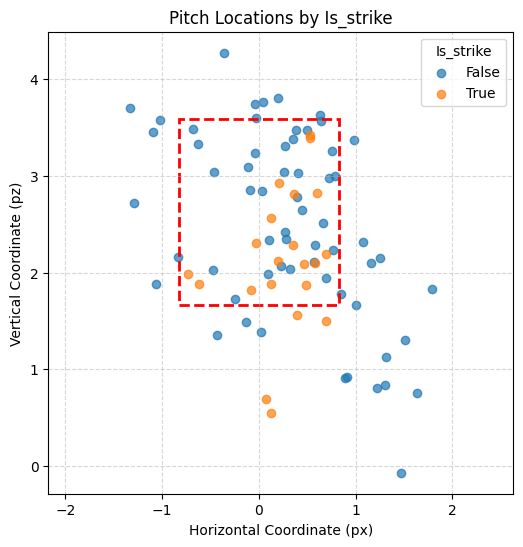

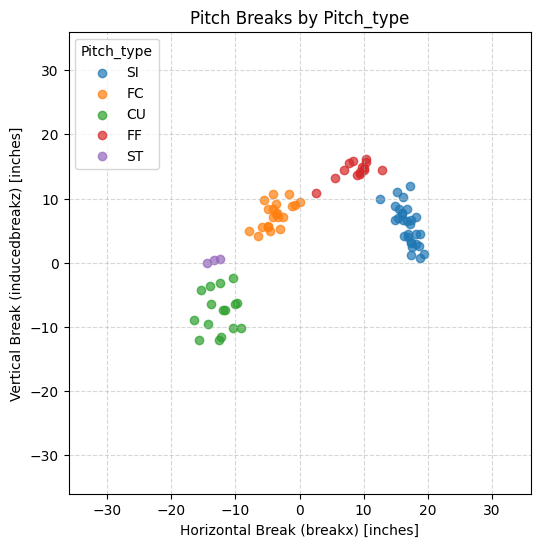

In [17]:
# game_feed = mlbfetch.gamefeed(745307)
pitch_df = april_games.pitches.to_df()
eflin_pitches = pitch_df[pitch_df['pitcher'] == 621107]
eflin_pitches['is_strike'] = eflin_pitches['pitch_call'].isin(['Swinging Strike', 'Called Strike', 'Swinging Strike (Blocked)'])
mlbplot.pitch_locations(eflin_pitches, 'is_strike')
mlbplot.pitch_movements(eflin_pitches)

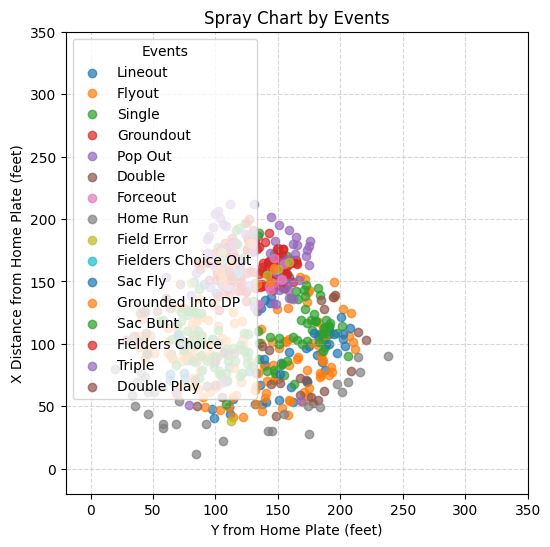

In [12]:
mlbplot.spray_chart(april_games.pitches.to_df())